# Advanced feature extraction.

# Importing packages

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
import distance
import path
import wordcloud
from sklearn.manifold import TSNE

In [41]:
uque=pd.read_csv("Desktop/updatequestion.csv")

In [4]:
uque=uque.fillna(" ")

In [5]:
del uque['Unnamed: 0']

In [6]:
uque

,id,qid1,qid2,question1,question2,is_duplicate,qid1fre,qid2fre,q1len,q2len,q1words,q2words,wordcommon,totalword,wordshare,totalfre,frediff
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,132.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,1,1,51,88,8,13,4.0,96.0,0.200000,2,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,140.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,90.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,1,1,76,39,13,7,2.0,91.0,0.100000,2,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,1,1,86,90,16,16,8.0,240.0,0.258065,2,0
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,1,1,19,62,4,11,0.0,40.0,0.000000,2,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,1,1,30,41,7,9,4.0,63.0,0.250000,2,0
8,8,17,18,When do you use ã· instead of ã?,"When do you use ""&"" instead of ""and""?",0,1,1,35,37,8,8,6.0,64.0,0.375000,2,0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,1,1,60,49,9,9,3.0,81.0,0.166667,2,0


In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stwords=stopwords.words("english")

In [9]:
len(stwords)

179

# NLP and Fuzzy features.

# Replacing english words into easy convertible words for python and using stemming words.

In [27]:
div=0.0001
def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")#'\'continues the code and this is for replacing the words
    x = re.sub(r"([0-9]+)000000", r"\1m", x)# Search throughout the questions for simillarity and changes as provided
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    porter=PorterStemmer()#Declaring stemming words.
    pattern=re.compile('\W')#Compile normal objects and return pattern object.
    
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

In [33]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    q1_tokens = q1.split()# Sentences to tokens conversion.
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    q1_words = set([word for word in q1_tokens if word not in stwords])#obtaining non-stopwords form question1.
    q2_words = set([word for word in q2_tokens if word not in stwords])#obtaining non-stopwords form question2.
    
    q1_stops = set([word for word in q1_tokens if word in stwords])#Get the stopwords in Questions1.
    q2_stops = set([word for word in q2_tokens if word in stwords])#Get the stopwords in Questions2.
    
    common_word_count = len(q1_words.intersection(q2_words))# Get the common non-stopwords from Question pair
    
    common_stop_count = len(q1_stops.intersection(q2_stops))# Get the common stopwords from Question pair
    
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))# Get the common Tokens from Question pair
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + div)# Each block of the array has the following feature.
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + div)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + div)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + div)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + div)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + div)
    
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])# Last word of both question is same or not and -ve numbers are counted from right to left of a string.
    
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])# First word of both question is same or not.
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))# absolute difference in length of tokens present in the string.
    
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2  #Average token Length of both Questions
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))

    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [60]:
if os.path.isfile("Desktop/updatequestion.csv"):
    uque=pd.read_csv("Desktop/updatequestion.csv")
    uque.fillna(" ")
# else:
    print("Extracting features for train:")      
    uque = extract_features(uque)
    uque.to_csv("trainquestion.csv", index=False)
uque.head(2)
    

Extracting features for train:
token features...
fuzzy features..


,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,qid1fre,qid2fre,q1len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,1,1,51,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


In [61]:
quest=uque['question1'].fillna(" ").apply(preprocess)#removes the special characters and modifies the strings.

In [63]:
quest

0         what is the step by step guide to invest in sh...
1         what is the story of kohinoor  koh i noor  dia...
2         how can i increase the speed of my internet co...
3         why am i mentally very lonely  how can i solve...
4         which one dissolve in water quikly sugar  salt...
5         astrology  i am a capricorn sun cap moon and c...
6                                       should i buy tiago 
7                            how can i be a good geologist 
8                       when do you use ã   instead of ã   
9         motorola  company   can i hack my charter moto...
10        method to find separation of slits using fresn...
11              how do i read and find my youtube comments 
12                     what can make physics easy to learn 
13              what was your first sexual experience like 
14        what are the laws to change your status from a...
15        what would a trump presidency mean for current...
16                             what does

In [65]:
duplicate=uque[uque['is_duplicate']==1]
notduplicate=uque[uque['is_duplicate']==0]

# Arranging all questions in one line.

In [68]:
alldup=np.dstack([duplicate['question1'],duplicate['question2']]).flatten()#arranges in a single order.
allnondup=np.dstack([notduplicate['question1'],notduplicate['question2']]).flatten()#arranges in a single order

In [73]:
print(alldup)
print('----------------------------------------------------------------------------------------------------')
print(allnondup)

['astrology  i am a capricorn sun cap moon and cap rising   what does that say about me '
 'i am a triple capricorn  sun  moon and ascendant in capricorn  what does this say about me '
 'how can i be a good geologist ' ...
 'what does jainism say about gays and homosexuality '
 'do you believe there is life after death '
 'is it true that there is life after death ']
----------------------------------------------------------------------------------------------------
['what is the step by step guide to invest in share market in india '
 'what is the step by step guide to invest in share market '
 'what is the story of kohinoor  koh i noor  diamond ' ...
 'i am having little hairfall problem but i want to use hair styling product  which one should i prefer out of gel  wax and clay '
 'what is like to have sex with cousin '
 'what is it like to have sex with your cousin ']


In [75]:
print('number of duplicate pairs ={}'.format(len(alldup)))
print('number of non-duplicate pairs={}'.format(len(allnondup)))

number of duplicate pairs =298612
number of non-duplicate pairs=510090


# Saving it into a text file

In [83]:
np.savetxt('Desktop/trainalldup.txt',alldup,delimiter=' ',fmt='%s',encoding='utf-8')

In [84]:
np.savetxt('Desktop/trainallnondup.txt',allnondup,delimiter=' ',fmt='%s',encoding='utf-8')

In [97]:
d = os.path.dirname('.')

textp_w = open(os.path.join(d, 'train_p.txt'),encoding='utf-8').read()
textn_w = open(os.path.join(d, 'train_n.txt'),encoding='utf-8').read()
stopwords = set(stwords)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.add('not')
stopwords.add("no")
stopwords.add('like')
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 16098361
Total number of words in non duplicate pair questions : 33115687


# Preparing a word cloud

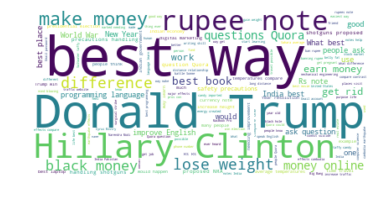

In [109]:
w=wordcloud.WordCloud(background_color='white',max_words=len(textp_w),stopwords=stopwords)
w.generate(textp_w)
plt.imshow(w, interpolation='bilinear')
plt.axis("off")
plt.show()

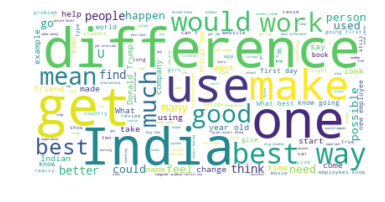

In [110]:
w=wordcloud.WordCloud(background_color='white',max_words=len(textn_w),stopwords=stopwords)
w.generate(textn_w)
plt.imshow(w, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\vivek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


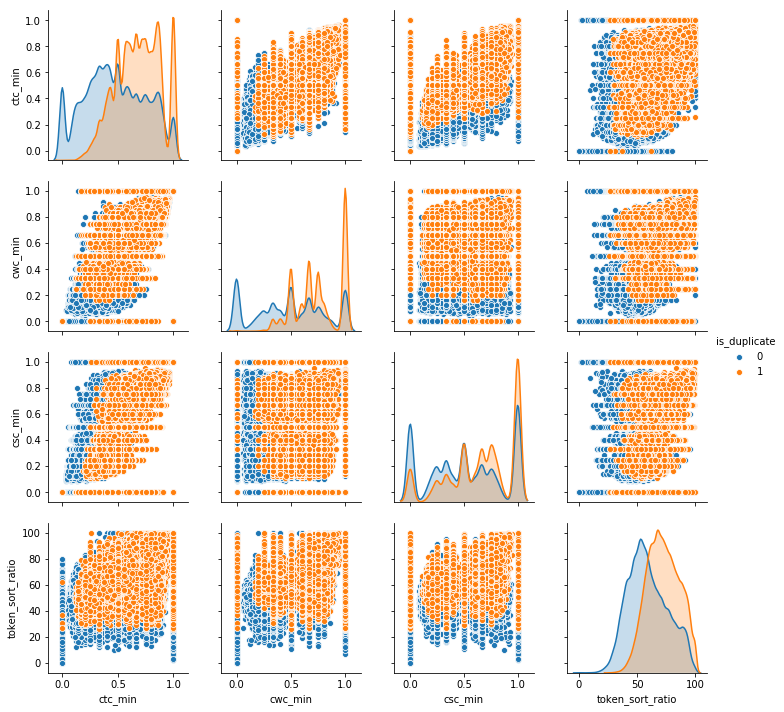

In [115]:
n=uque.shape[0]
sns.pairplot(uque[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])


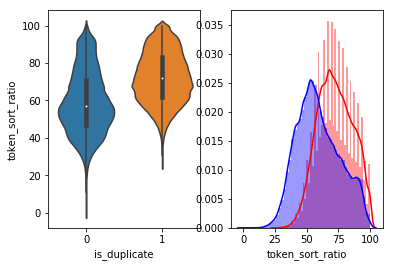

In [117]:
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = uque[0:] , )

plt.subplot(1,2,2)
sns.distplot(uque[uque['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(uque[uque['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

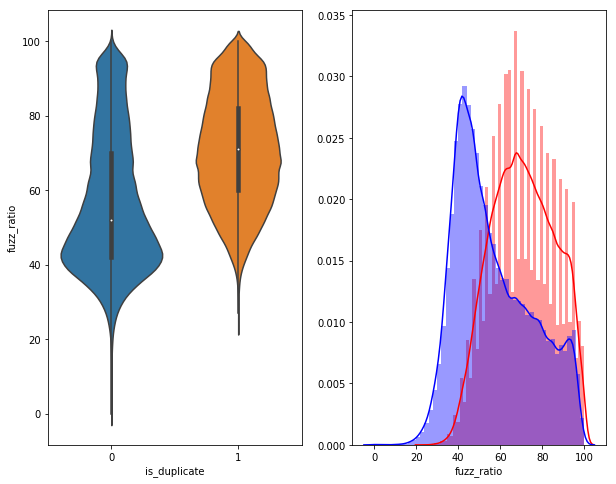

In [118]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = uque[0:] , )

plt.subplot(1,2,2)
sns.distplot(uque[uque['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(uque[uque['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

In [119]:
from sklearn.preprocessing import MinMaxScaler

uquep_subsampled = uque[0:5000]
X = MinMaxScaler().fit_transform(uquep_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' ,\
                                                 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' ,\
                                                 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,\
                                                 'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = uquep_subsampled['is_duplicate'].values

C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [122]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.015s...
[t-SNE] Computed neighbors for 5000 samples in 0.364s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.116487
[t-SNE] Computed conditional probabilities in 0.235s
[t-SNE] Iteration 50: error = 82.1594543, gradient norm = 0.0382346 (50 iterations in 2.432s)
[t-SNE] Iteration 100: error = 70.6177902, gradient norm = 0.0113225 (50 iterations in 1.806s)
[t-SNE] Iteration 150: error = 68.6683578, gradient norm = 0.0052247 (50 iterations in 1.787s)
[t-SNE] Iteration 200: error = 67.8168259, gradient norm = 0.0043456 (50 iterations in 1.850s)
[t-SNE] Iteration 250: error = 67.2748718, gradient norm = 0.0031466

C:\Users\vivek\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


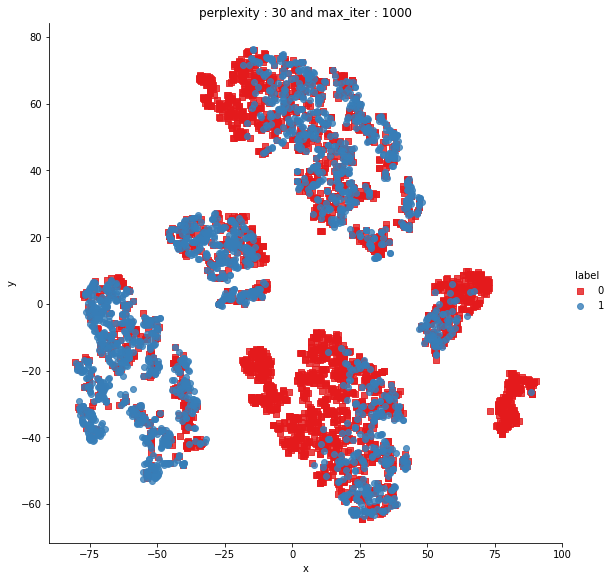

In [123]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()